In [ ]:
pip install tensorflow numpy matplotlib scikit-learn


In [ ]:
import numpy as np
import struct
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Function to load MNIST data from IDX files
def load_mnist(image_file_path, label_file_path):
    with open(image_file_path, 'rb') as img_file:
        _, num_images, rows, cols = struct.unpack(">IIII", img_file.read(16))
        image_data = np.fromfile(img_file, dtype=np.uint8).reshape(num_images, rows, cols, 1)

    with open(label_file_path, 'rb') as lbl_file:
        _, num_labels = struct.unpack(">II", lbl_file.read(8))
        label_data = np.fromfile(lbl_file, dtype=np.uint8)

    return image_data, label_data

# Load the dataset
image_file_path = '/content/train-images.idx3-ubyte'
label_file_path = '/content/train-labels.idx1-ubyte'
images, labels = load_mnist(image_file_path, label_file_path)

# Normalize images
images = images.astype('float32') / 255.0

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)





In [ ]:
# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))

# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(X_val, y_val)

print(f"Validation Accuracy: {val_acc:.4f}")


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 90s 57ms/step - accuracy: 0.8818 - loss: 0.3860 - val_accuracy: 0.9781 - val_loss: 0.0730
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 113s 38ms/step - accuracy: 0.9817 - loss: 0.0586 - val_accuracy: 0.9838 - val_loss: 0.0493
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 53s 36ms/step - accuracy: 0.9874 - loss: 0.0426 - val_accuracy: 0.9861 - val_loss: 0.0433
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 36ms/step - accuracy: 0.9913 - loss: 0.0277 - val_accuracy: 0.9894 - val_loss: 0.0327
Epoch 5/5


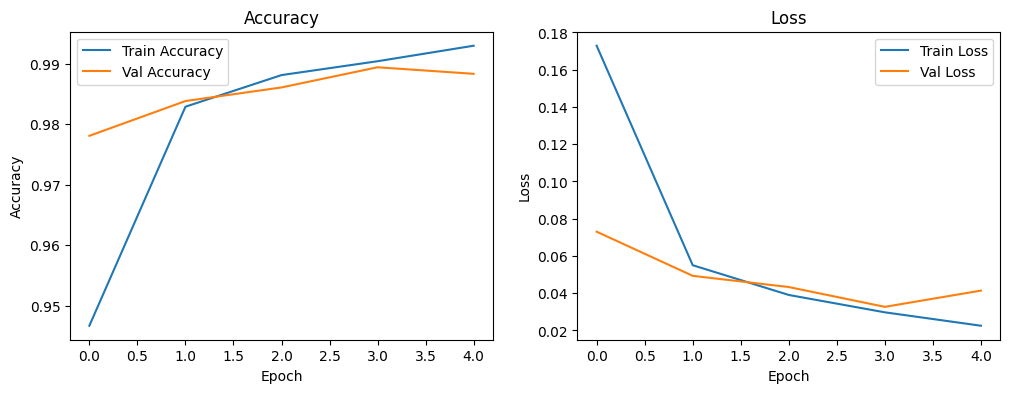

In [15]:
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [16]:
model.save('mnist_cnn_model.h5')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Predicted Digit: 2


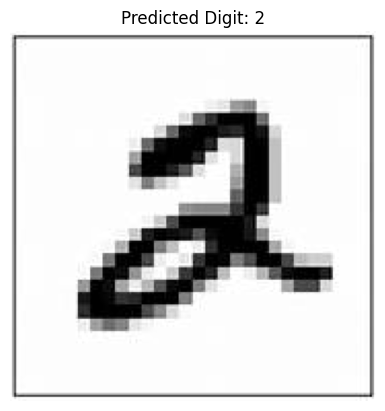

In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import cv2
import matplotlib.pyplot as plt

# Load the trained model
model = load_model('mnist_cnn_model.h5')

# Function to preprocess the input image
def preprocess_image(img_path):
    # Load the image with grayscale
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # Resize the image to 28x28 pixels (as the model expects this size)
    img = cv2.resize(img, (28, 28))

    # Invert the image colors (because MNIST dataset has white text on black background)
    img = cv2.bitwise_not(img)

    # Normalize the image
    img = img.astype('float32') / 255.0

    # Reshape the image to add a batch dimension
    img = img.reshape(1, 28, 28, 1)

    return img

# Function to predict the digit in the input image
def predict_digit(img_path):
    # Preprocess the image
    img = preprocess_image(img_path)

    # Make prediction
    prediction = model.predict(img)

    # Get the predicted digit
    predicted_digit = np.argmax(prediction)

    return predicted_digit

# Example usage
img_path = '/content/th (6).jpg'  # Replace with the path to your image
predicted_digit = predict_digit(img_path)

print(f"Predicted Digit: {predicted_digit}")

# Display the image along with the prediction
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title(f'Predicted Digit: {predicted_digit}')
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted Digit: 6


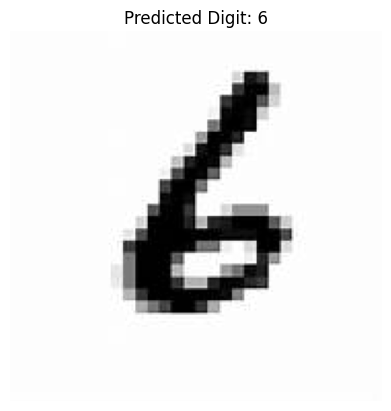

In [20]:
img_path = '/content/IMG1.jpg'  # Replace with the path to your image
predicted_digit = predict_digit(img_path)

print(f"Predicted Digit: {predicted_digit}")

# Display the image along with the prediction
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title(f'Predicted Digit: {predicted_digit}')
plt.axis('off')
plt.show()